<a href="https://colab.research.google.com/github/ktonon0401/AI-training/blob/main/CNN_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [4]:
from tensorflow.keras.utils import to_categorical
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255 #One hot encoding
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [5]:
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model= Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model= Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(1024,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(500,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation = 'softmax'))


In [6]:
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
# from keras.datasets import mnist
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test),verbose=1)


Epoch 1/10
782/782 [==============================] - 27s 22ms/step - loss: 3.7001 - accuracy: 0.1420 - val_loss: 3.2253 - val_accuracy: 0.2237
Epoch 2/10
782/782 [==============================] - 17s 22ms/step - loss: 2.7785 - accuracy: 0.3031 - val_loss: 2.6928 - val_accuracy: 0.3266
Epoch 3/10
782/782 [==============================] - 17s 22ms/step - loss: 2.1903 - accuracy: 0.4257 - val_loss: 2.4580 - val_accuracy: 0.3726
Epoch 4/10
782/782 [==============================] - 17s 22ms/step - loss: 1.6517 - accuracy: 0.5481 - val_loss: 2.4320 - val_accuracy: 0.3903
Epoch 5/10
782/782 [==============================] - 17s 22ms/step - loss: 1.0762 - accuracy: 0.6931 - val_loss: 2.7166 - val_accuracy: 0.3865
Epoch 6/10
782/782 [==============================] - 17s 22ms/step - loss: 0.5599 - accuracy: 0.8330 - val_loss: 3.2174 - val_accuracy: 0.3833
Epoch 7/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2766 - accuracy: 0.9169 - val_loss: 3.6498 - val_accuracy:

(1, 32, 32, 3)

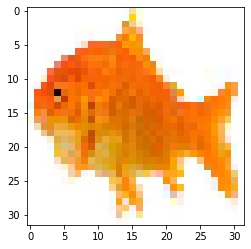

In [7]:
from keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
img=load_img('fish1.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
img.shape

In [8]:
model.save('final.hs')

INFO:tensorflow:Assets written to: final.hs/assets


In [9]:
from keras.models import Sequential,load_model
model_pre=load_model('final.hs')

In [10]:
import numpy as np
np.argmax(model_pre.predict(img),axis=1)

array([83])